In [1]:
from manim import *
from scipy.optimize import fsolve
import numpy as np
import random

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.3

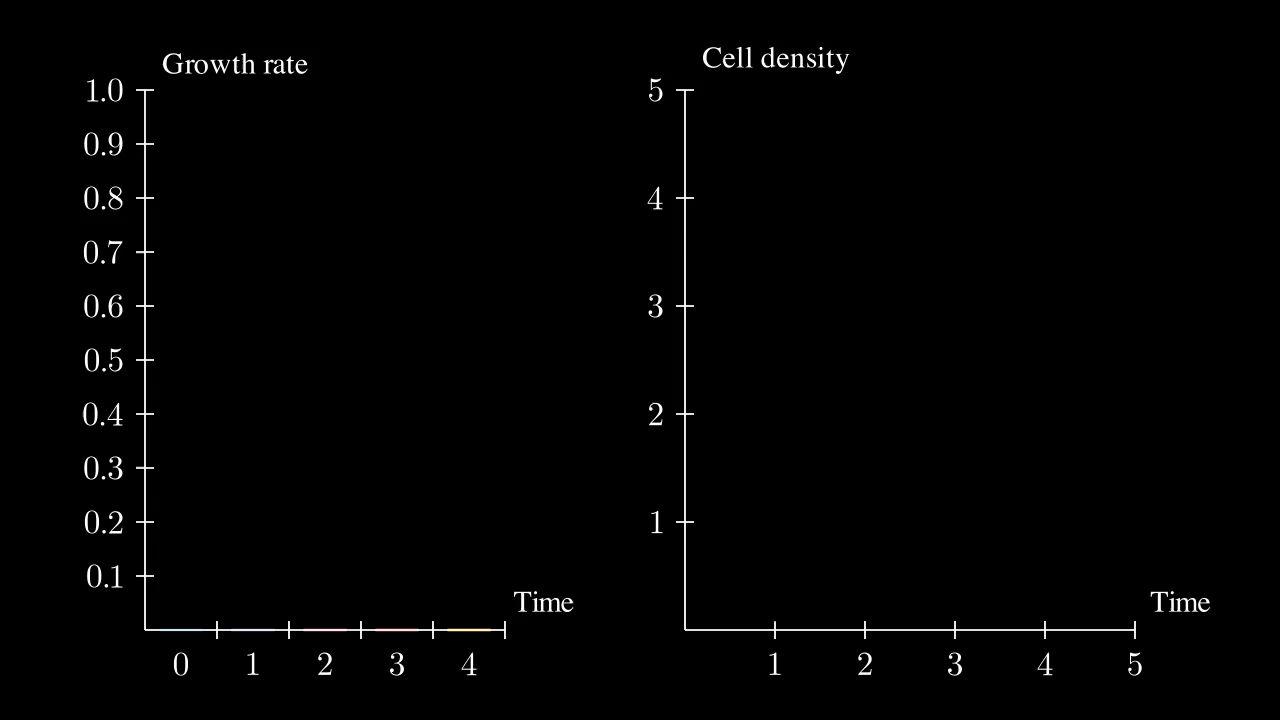

In [127]:
%%manim -qm --format=gif VccDigitalTwin1

class VccDigitalTwin1(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("Cell density").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Growth rate").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        # # Titles
        # measure = Tex(r"Measure",color=GREEN)
        # measure.shift(RIGHT*3.5 + UP*2)
        # pred_rate = Tex(r"Predict growth",color='#003f5c')
        # pred_rate.shift(RIGHT*3.5 + UP*2)
        # pred_vcc = Tex(r"Predict cell density")
        # pred_vcc.shift(RIGHT*3.5 + UP*2)
        # pred_time = Tex(r"Predict transfer time",color=YELLOW)
        # pred_time.shift(RIGHT*3.5 + UP*2)

        def add_offline(self,y,dot_prev = None,line_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.play(Create(dot))
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY),line_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.play(Create(line))
            return func2(t0 + 1) + random.uniform(-0.25,0.25),line

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            if t1[0] > t0 + 1:
                line = DashedVMobject(ax.plot(func2,x_range = [t0 + 1,t1[0]],color=YELLOW))
                self.play(Create(line),tt.animate.set_value(t1))
                self.play(Uncreate(line))
            else:    
                self.play(tt.animate.set_value(t1))#,FadeOut(pred_vcc),FadeIn(pred_time))
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        delta_t = 1
        self.add(ax, ax_labels, chart, chart_labels)
        self.wait()
        dot = add_offline(self,0.5)
        self.wait()
        self.play(r0.animate.set_value(0.5))#,FadeOut(measure),FadeIn(pred_rate))
        self.wait()
        y,line = predict(self,dot,r0.get_value(),delta_t)
        self.wait()
        self.play(Create(polygon))
        self.wait()
        transfer(self,dot,r0.get_value())
        
        # dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        # self.play(r1.animate.set_value(0.9))
        # y,line = predict(self,dot,r1.get_value(),delta_t)
        # transfer(self,dot,r1.get_value())
        # dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        # self.play(r2.animate.set_value(0.4))
        # y,line = predict(self,dot,r2.get_value(),delta_t)
        # transfer(self,dot,r2.get_value())
        # dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        # self.play(r3.animate.set_value(0.2))
        # y,line = predict(self,dot,r3.get_value(),delta_t)
        # transfer(self,dot,r3.get_value())
        # dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        # self.play(r4.animate.set_value(0.1))
        # y = predict(self,dot,r4.get_value(),delta_t)

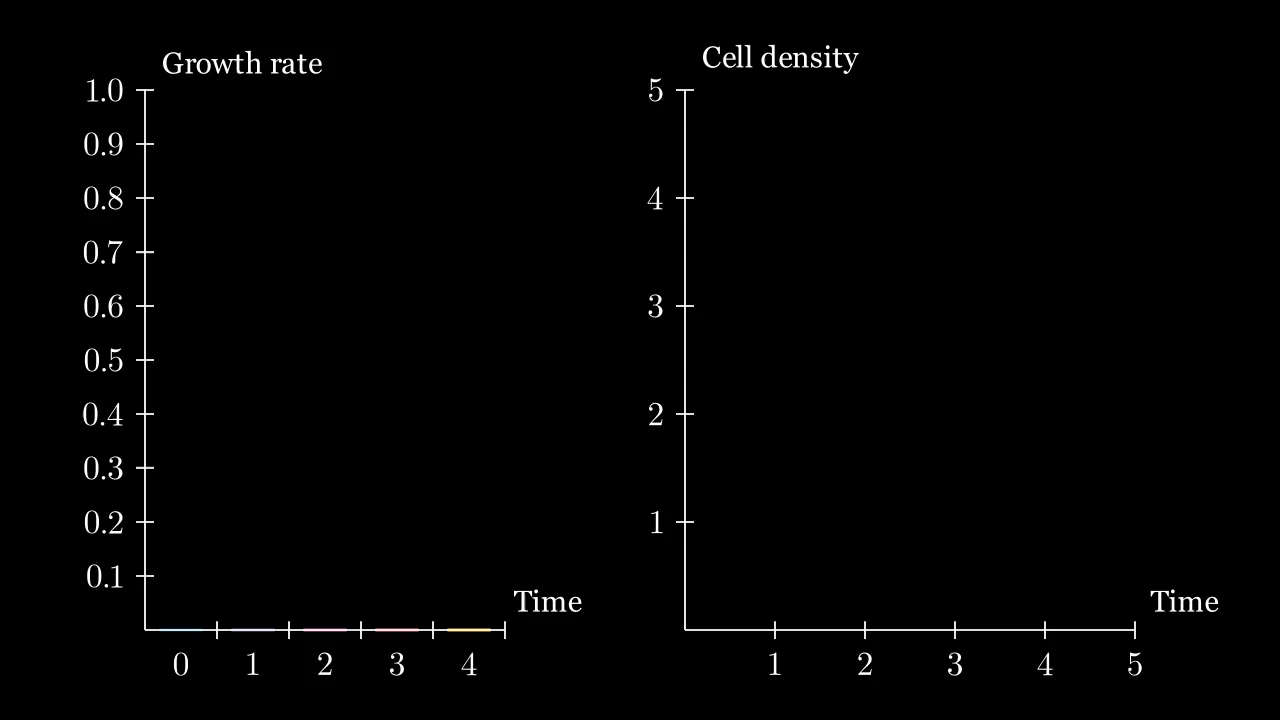

In [4]:
%%manim -qm --format=gif VccDigitalTwin1_1

class VccDigitalTwin1_1(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("Cell density").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Growth rate").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        # # Titles
        # measure = Tex(r"Measure",color=GREEN)
        # measure.shift(RIGHT*3.5 + UP*2)
        # pred_rate = Tex(r"Predict growth",color='#003f5c')
        # pred_rate.shift(RIGHT*3.5 + UP*2)
        # pred_vcc = Tex(r"Predict cell density")
        # pred_vcc.shift(RIGHT*3.5 + UP*2)
        # pred_time = Tex(r"Predict transfer time",color=YELLOW)
        # pred_time.shift(RIGHT*3.5 + UP*2)

        def add_offline(self,y,dot_prev = None,line_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.play(Create(dot))
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY),line_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.play(Create(line))
            return func2(t0 + 1) + random.uniform(-0.25,0.25),line

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            if t1[0] > t0 + 1:
                line = DashedVMobject(ax.plot(func2,x_range = [t0 + 1,t1[0]],color=YELLOW))
                self.play(Create(line),tt.animate.set_value(t1))
                self.play(Uncreate(line))
            else:    
                self.play(tt.animate.set_value(t1))#,FadeOut(pred_vcc),FadeIn(pred_time))
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        delta_t = 1
        self.add(ax, ax_labels, chart, chart_labels)
        # self.wait()
        dot = add_offline(self,0.5)
        # self.wait()
        # self.play(r0.animate.set_value(0.5))#,FadeOut(measure),FadeIn(pred_rate))
        # self.wait()
        # y,line = predict(self,dot,r0.get_value(),delta_t)
        # self.wait()
        # self.play(Create(polygon))
        # self.wait()
        # transfer(self,dot,r0.get_value())
        

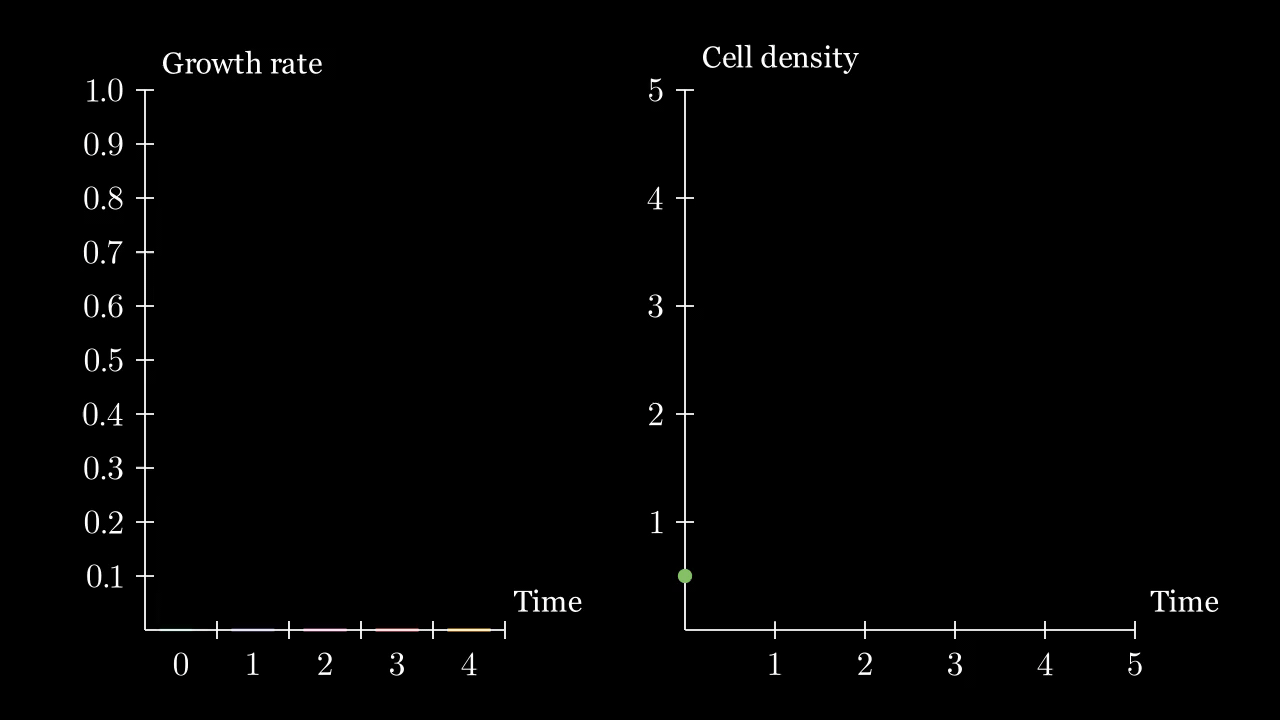

In [5]:
%%manim -qm --format=gif VccDigitalTwin1_2

class VccDigitalTwin1_2(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("Cell density").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Growth rate").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        # # Titles
        # measure = Tex(r"Measure",color=GREEN)
        # measure.shift(RIGHT*3.5 + UP*2)
        # pred_rate = Tex(r"Predict growth",color='#003f5c')
        # pred_rate.shift(RIGHT*3.5 + UP*2)
        # pred_vcc = Tex(r"Predict cell density")
        # pred_vcc.shift(RIGHT*3.5 + UP*2)
        # pred_time = Tex(r"Predict transfer time",color=YELLOW)
        # pred_time.shift(RIGHT*3.5 + UP*2)

        def add_offline(self,y,dot_prev = None,line_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.add(dot)
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY),line_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.play(Create(line))
            return func2(t0 + 1) + random.uniform(-0.25,0.25),line

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            if t1[0] > t0 + 1:
                line = DashedVMobject(ax.plot(func2,x_range = [t0 + 1,t1[0]],color=YELLOW))
                self.play(Create(line),tt.animate.set_value(t1))
                self.play(Uncreate(line))
            else:    
                self.play(tt.animate.set_value(t1))#,FadeOut(pred_vcc),FadeIn(pred_time))
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        delta_t = 1
        self.add(ax, ax_labels, chart, chart_labels)
        # self.wait()
        dot = add_offline(self,0.5)
        # self.wait()
        self.play(r0.animate.set_value(0.5))#,FadeOut(measure),FadeIn(pred_rate))
        # self.wait()
        # y,line = predict(self,dot,r0.get_value(),delta_t)
        # self.wait()
        # self.play(Create(polygon))
        # self.wait()
        # transfer(self,dot,r0.get_value())
        

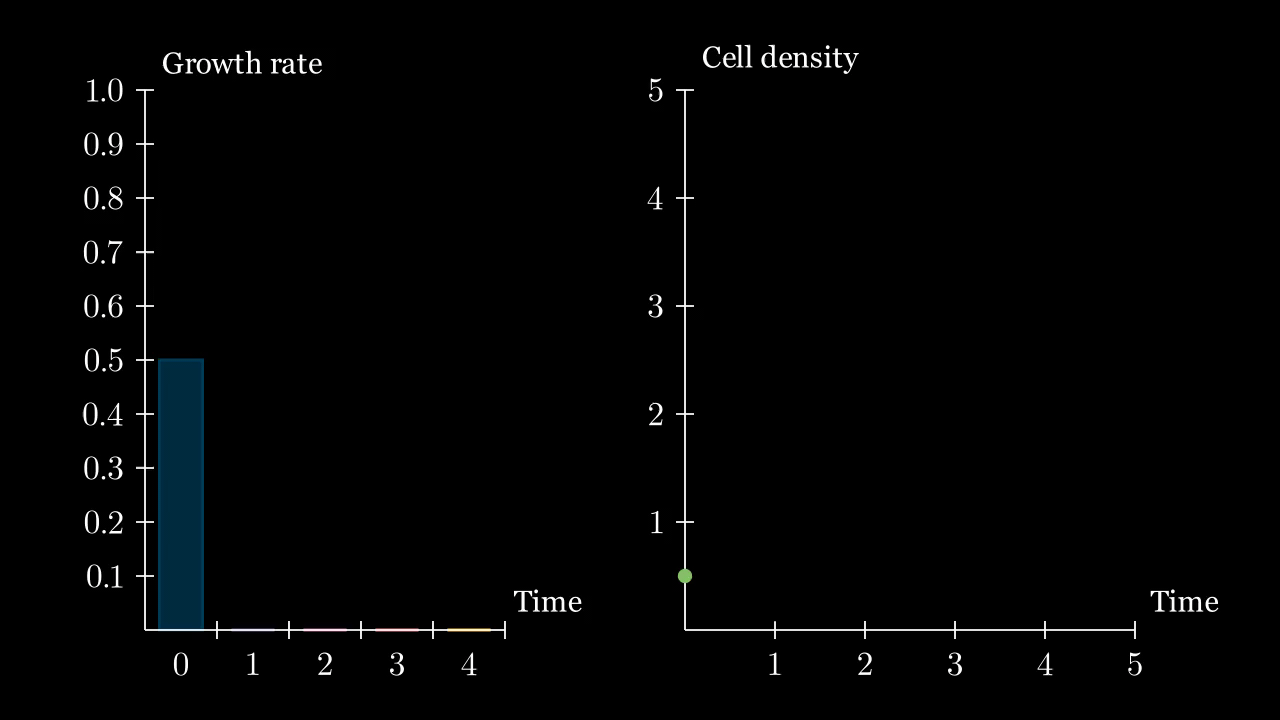

In [14]:
%%manim -qm --format=gif VccDigitalTwin1_3

class VccDigitalTwin1_3(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("Cell density").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Growth rate").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        # # Titles
        # measure = Tex(r"Measure",color=GREEN)
        # measure.shift(RIGHT*3.5 + UP*2)
        # pred_rate = Tex(r"Predict growth",color='#003f5c')
        # pred_rate.shift(RIGHT*3.5 + UP*2)
        # pred_vcc = Tex(r"Predict cell density")
        # pred_vcc.shift(RIGHT*3.5 + UP*2)
        # pred_time = Tex(r"Predict transfer time",color=YELLOW)
        # pred_time.shift(RIGHT*3.5 + UP*2)

        def add_offline(self,y,dot_prev = None,line_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.add(dot)
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY),line_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.play(Create(line))
            return func2(t0 + 1) + random.uniform(-0.25,0.25),line

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            if t1[0] > t0 + 1:
                line = DashedVMobject(ax.plot(func2,x_range = [t0 + 1,t1[0]],color=YELLOW))
                self.play(Create(line),tt.animate.set_value(t1))
                self.play(Uncreate(line))
            else:    
                self.play(tt.animate.set_value(t1))#,FadeOut(pred_vcc),FadeIn(pred_time))
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        delta_t = 1
        self.add(ax, ax_labels, chart, chart_labels)
        # self.wait()
        dot = add_offline(self,0.5)
        # self.wait()
        r0.set_value(0.5)
        chart_updater(chart)
        # self.wait()
        y,line = predict(self,dot,r0.get_value(),delta_t)
        # self.wait()
        # self.play(Create(polygon))
        # self.wait()
        # transfer(self,dot,r0.get_value())
        

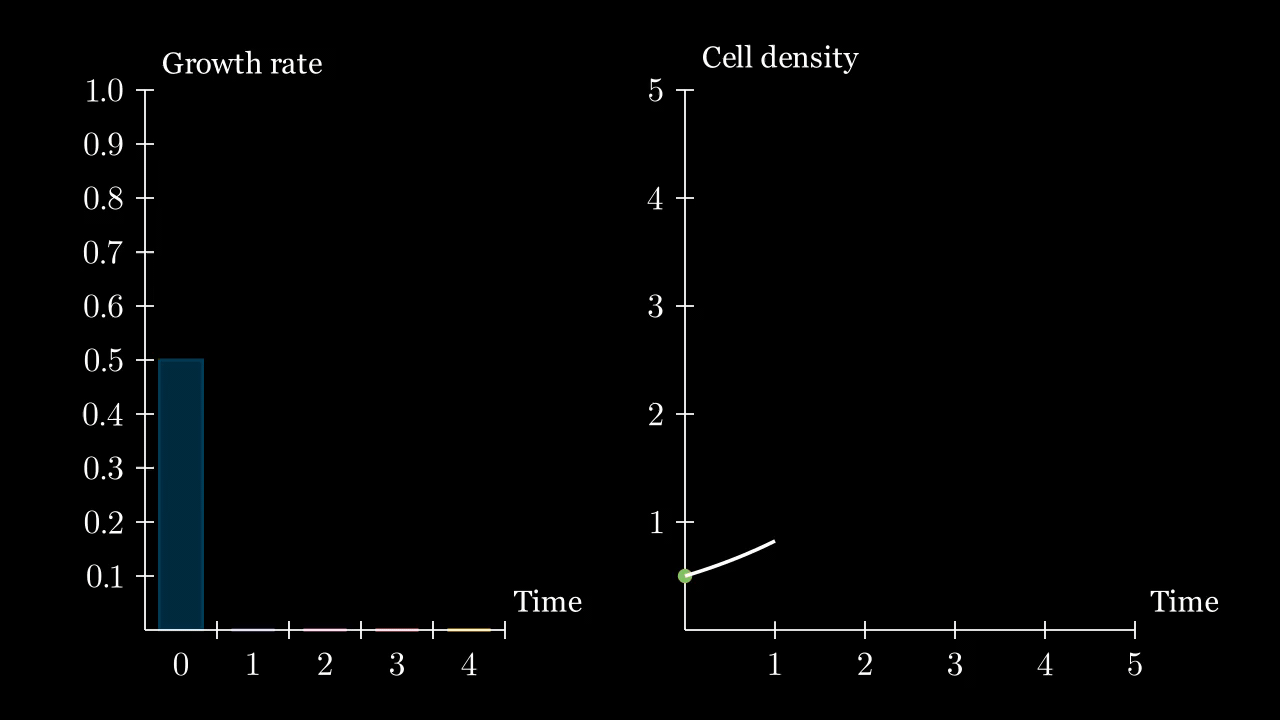

In [16]:
%%manim -qm --format=gif VccDigitalTwin1_4

class VccDigitalTwin1_4(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("Cell density").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Growth rate").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        # # Titles
        # measure = Tex(r"Measure",color=GREEN)
        # measure.shift(RIGHT*3.5 + UP*2)
        # pred_rate = Tex(r"Predict growth",color='#003f5c')
        # pred_rate.shift(RIGHT*3.5 + UP*2)
        # pred_vcc = Tex(r"Predict cell density")
        # pred_vcc.shift(RIGHT*3.5 + UP*2)
        # pred_time = Tex(r"Predict transfer time",color=YELLOW)
        # pred_time.shift(RIGHT*3.5 + UP*2)

        def add_offline(self,y,dot_prev = None,line_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.add(dot)
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY),line_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.add(line)
            return func2(t0 + 1) + random.uniform(-0.25,0.25),line

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            if t1[0] > t0 + 1:
                line = DashedVMobject(ax.plot(func2,x_range = [t0 + 1,t1[0]],color=YELLOW))
                self.play(Create(line),tt.animate.set_value(t1))
                self.play(Uncreate(line))
            else:    
                self.play(tt.animate.set_value(t1))#,FadeOut(pred_vcc),FadeIn(pred_time))
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        delta_t = 1
        self.add(ax, ax_labels, chart, chart_labels)
        # self.wait()
        dot = add_offline(self,0.5)
        # self.wait()
        r0.set_value(0.5)
        chart_updater(chart)
        # self.wait()
        y,line = predict(self,dot,r0.get_value(),delta_t)
        # self.wait()
        self.play(Create(polygon))
        # self.wait()
        transfer(self,dot,r0.get_value())
        

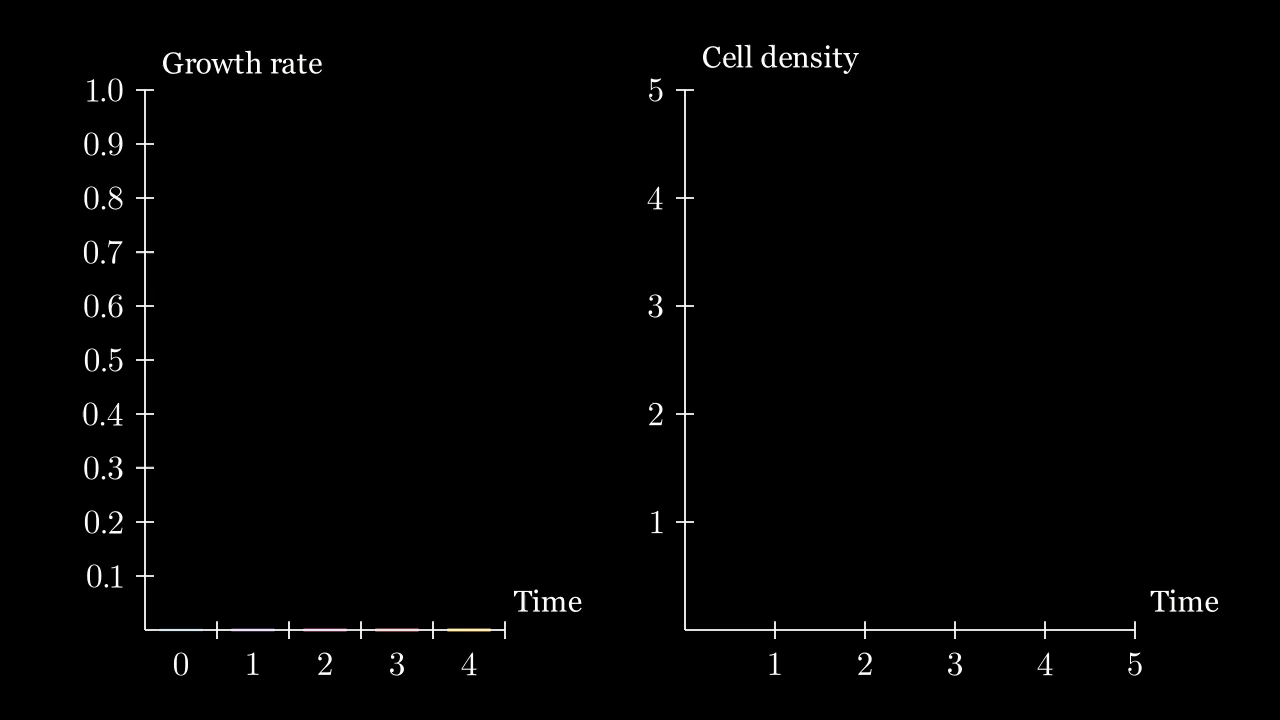

In [17]:
%%manim -qm --format=gif VccDigitalTwin2

class VccDigitalTwin2(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("Cell density").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Growth rate").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        # # Titles
        # measure = Tex(r"Measure",color=GREEN)
        # measure.shift(RIGHT*3.5 + UP*2)
        # pred_rate = Tex(r"Predict growth",color='#003f5c')
        # pred_rate.shift(RIGHT*3.5 + UP*2)
        # pred_vcc = Tex(r"Predict cell density")
        # pred_vcc.shift(RIGHT*3.5 + UP*2)
        # pred_time = Tex(r"Predict transfer time",color=YELLOW)
        # pred_time.shift(RIGHT*3.5 + UP*2)

        def add_offline(self,y,dot_prev = None,line_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.play(Create(dot))
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY),line_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.play(Create(line))
            return func2(t0 + 1) + random.uniform(-0.25,0.25),line

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            if t1[0] > t0 + 1:
                line = DashedVMobject(ax.plot(func2,x_range = [t0 + 1,t1[0]],color=YELLOW))
                self.play(Create(line),tt.animate.set_value(t1))
                self.play(Uncreate(line))
            else:    
                self.play(tt.animate.set_value(t1))#,FadeOut(pred_vcc),FadeIn(pred_time))
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        delta_t = 1
        self.add(ax, ax_labels, chart, chart_labels)
        # self.wait()
        dot = add_offline(self,0.5)
        # self.wait()
        self.play(r0.animate.set_value(0.5))#,FadeOut(measure),FadeIn(pred_rate))
        # self.wait()
        y,line = predict(self,dot,r0.get_value(),delta_t)
        # self.wait()
        self.play(Create(polygon))
        # self.wait()
        transfer(self,dot,r0.get_value())
        
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r1.animate.set_value(0.9))
        y,line = predict(self,dot,r1.get_value(),delta_t)
        transfer(self,dot,r1.get_value())
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r2.animate.set_value(0.4))
        y,line = predict(self,dot,r2.get_value(),delta_t)
        transfer(self,dot,r2.get_value())
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r3.animate.set_value(0.2))
        y,line = predict(self,dot,r3.get_value(),delta_t)
        transfer(self,dot,r3.get_value())
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r4.animate.set_value(0.1))
        y = predict(self,dot,r4.get_value(),delta_t)

In [2]:
%%manim -qh --format=png VccDigitalTwinPng

class VccDigitalTwinPng(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("Cell density").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Growth rate").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        # # Titles
        # measure = Tex(r"Measure",color=GREEN)
        # measure.shift(RIGHT*3.5 + UP*2)
        # pred_rate = Tex(r"Predict growth",color='#003f5c')
        # pred_rate.shift(RIGHT*3.5 + UP*2)
        # pred_vcc = Tex(r"Predict cell density")
        # pred_vcc.shift(RIGHT*3.5 + UP*2)
        # pred_time = Tex(r"Predict transfer time",color=YELLOW)
        # pred_time.shift(RIGHT*3.5 + UP*2)

        def add_offline(self,y,dot_prev = None,line_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.play(Create(dot))
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY),line_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.play(Create(line))
            return func2(t0 + 1) + random.uniform(-0.25,0.25),line

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            if t1[0] > t0 + 1:
                line = DashedVMobject(ax.plot(func2,x_range = [t0 + 1,t1[0]],color=YELLOW))
                self.play(Create(line),tt.animate.set_value(t1))
                self.play(Uncreate(line))
            else:    
                self.play(tt.animate.set_value(t1))#,FadeOut(pred_vcc),FadeIn(pred_time))
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        delta_t = 1
        self.add(ax, ax_labels, chart, chart_labels)
        # self.wait()
        dot = add_offline(self,0.5)
        # self.wait()
        self.play(r0.animate.set_value(0.5))#,FadeOut(measure),FadeIn(pred_rate))
        # self.wait()
        y,line = predict(self,dot,r0.get_value(),delta_t)
        # self.wait()
        self.play(Create(polygon))
        # self.wait()
        transfer(self,dot,r0.get_value())
        
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r1.animate.set_value(0.9))
        y,line = predict(self,dot,r1.get_value(),delta_t)
        transfer(self,dot,r1.get_value())
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r2.animate.set_value(0.4))
        y,line = predict(self,dot,r2.get_value(),delta_t)
        transfer(self,dot,r2.get_value())
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r3.animate.set_value(0.2))
        y,line = predict(self,dot,r3.get_value(),delta_t)
        transfer(self,dot,r3.get_value())
        dot = add_offline(self,y,dot_prev = dot,line_prev=line)
        self.play(r4.animate.set_value(0.1))
        y = predict(self,dot,r4.get_value(),delta_t)